# Dataset de ataques cardíacos predicción de parada por modelo binario

In [529]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [530]:
import pandas as pd


df=pd.read_csv(path+'heart.csv')

# División de Train y Test

In [531]:
from sklearn.calibration import LabelEncoder

X=df.drop('output',axis=1)
le=LabelEncoder()
y=le.fit_transform(df['output'])

In [532]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [533]:
y_train

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1], dtype=int64)

### Estandarización de los valores

In [534]:
from sklearn.discriminant_analysis import StandardScaler


sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_val=sc.transform(X_val)

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [535]:
X_val

array([[-6.58985181e+00, -2.21165720e+03, -8.42702880e+00,
        -8.13664264e+00, -4.69305139e+00, -1.08200940e+04,
        -6.58970406e+02, -6.94518198e+00, -1.25426439e+03,
        -4.84822027e+00, -4.94148026e+02, -4.86721777e+00,
        -6.36641533e+02],
       [-6.58985181e+00, -4.46677565e+02, -6.98701611e+00,
        -8.13664264e+00, -4.69305139e+00, -1.08200940e+04,
        -6.58970406e+02, -6.94518198e+00, -1.25426439e+03,
        -5.92566648e+00, -2.14977154e+02, -3.85108700e+00,
        -6.36641533e+02],
       [-6.58985182e+00, -2.21165720e+03, -6.98701611e+00,
        -8.13664264e+00, -4.69305139e+00, -1.08200940e+04,
        -1.00601139e+02, -6.94518198e+00, -1.25426439e+03,
        -6.23350826e+00, -2.14977154e+02, -6.89947931e+00,
        -6.36641533e+02],
       [-6.58985182e+00, -4.46677565e+02, -6.26700976e+00,
        -8.13664264e+00, -4.69305139e+00, -1.08200940e+04,
        -1.00601139e+02, -6.94518198e+00, -1.25426439e+03,
        -5.77174560e+00, -3.54562590e

## Análisis de modelos

# Recorrido de modelos

In [536]:
y_train

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [537]:
X_train.shape

(227, 13)

In [538]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [539]:
# Definir el modelo con una arquitectura más profunda y diferentes funciones de activación
model = Sequential()
model.add(Dense(32,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(64,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(32,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compilar el modelo con una tasa de aprendizaje más alta y el optimizador SGD
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.001), metrics=["accuracy","recall"])



c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [540]:
# Nos enseña su estado actual

model.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_134 (Dense)               │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

In [541]:
import sys
# Datos de validación y las vueltas que recorre, deverá pillar el mejor del sistema
checkpoint_cb = keras.callbacks.ModelCheckpoint(path+'assets/model_keras_callbacks.keras',save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=15,restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=sys.maxsize,validation_data=(X_test,y_test),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/9223372036854775807


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4919 - loss: 0.7181 - recall: 0.2210 - val_accuracy: 0.5132 - val_loss: 0.6873 - val_recall: 0.0976
Epoch 2/9223372036854775807
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4593 - loss: 0.7203 - recall: 0.0978 - val_accuracy: 0.5132 - val_loss: 0.6851 - val_recall: 0.0976
Epoch 3/9223372036854775807
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4936 - loss: 0.7261 - recall: 0.2080 - val_accuracy: 0.5132 - val_loss: 0.6829 - val_recall: 0.0976
Epoch 4/9223372036854775807
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4784 - loss: 0.7194 - recall: 0.2214 - val_accuracy: 0.5132 - val_loss: 0.6808 - val_recall: 0.0976
Epoch 5/9223372036854775807
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4850 - loss: 0.7214 - recall: 0.1936 - val_accuracy: 0.5132 - val_loss: 0.6787 - val_recall: 0.0976
Epoch 6/9223372036854775807
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5317 - loss: 0.7135 - recall: 0.2577 - val_accur

<Axes: >

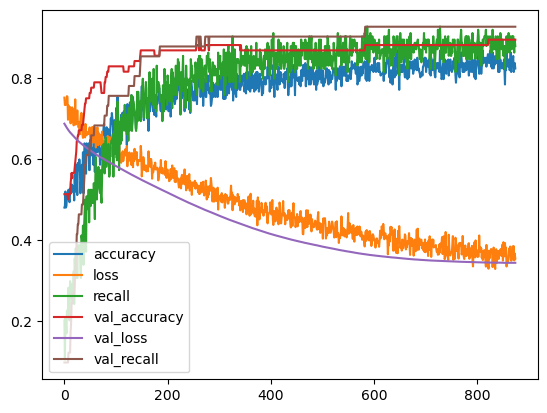

In [542]:
import pandas as pd

# Cuando hay una separación notable tras cruzada es el sobreentrenamiento
pd.DataFrame(history.history).plot()

In [543]:
mse_test = model.evaluate(X_test,y_test)
#Modelo con los datos de Test para ver el rendimiento

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8810 - loss: 0.3675 - recall: 0.9113 


In [544]:
X_nueva = X_test[:15]
y_nueva = model(X_nueva)

In [545]:
print(y_nueva)
print(y_test[:15])

# Vemos que las predicciones son bastante acertadas para los pocos datos que tenemos

tf.Tensor(
[[1.7586280e-01]
 [6.6800517e-01]
 [8.3503187e-01]
 [8.8086687e-03]
 [8.0855227e-01]
 [7.3524135e-01]
 [7.9838353e-01]
 [1.4453758e-04]
 [4.4089491e-03]
 [7.0644027e-01]
 [7.8194588e-01]
 [3.3314113e-02]
 [8.4019035e-01]
 [1.0388227e-01]
 [9.5006895e-01]], shape=(15, 1), dtype=float32)
[0 0 1 0 1 1 1 0 0 1 1 1 1 0 1]
